# Multidimensional Statistical Descriptive Analysis - Iris Dataset
 
The Iris dataset has 150 instances with 4 feature columns. The data has measures taken from 3 different types of flower, therefore, we have 3 classes. Some datasets have more variables than it is needed to perform classification tasks. This is because many variables may have redundant information already present in other variables. Variables that will not add any useful knowledge to a machine learning model.

Using simple descriptive statistics, we can compare every feature to find out if all 4 are really necessary. If we see a high degree of correlation between any pair of variables, we will remove one of them and check what happens.

In [1]:
import pandas as pd

iris = pd.read_csv("../data/raw/iris.data", header=None)
print(iris)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]




---

Let us use numpy and scipy functions to measure the mean, variance, skewnessness and kurtosis of each Iris feature. By studying these measures we can have an idea of how the features values are distributed and how much they contribute to the dependent variable, the flower type.

In [4]:
from scipy import stats
import numpy as np

# calculate descriptive measures for each feature in the dataset
iris_mean = [np.mean(iris[0]), np.mean(iris[1]), np.mean(iris[2]), np.mean(iris[3])]
iris_variance = [np.var(iris[0]), np.var(iris[1]), np.var(iris[2]), np.var(iris[3])]
iris_skewness = [stats.skew(iris[0]), stats.skew(iris[1]), stats.skew(iris[2]), stats.skew(iris[3])]
iris_kurtosis = [stats.kurtosis(iris[0]), stats.kurtosis(iris[1]), stats.kurtosis(iris[2]), stats.kurtosis(iris[3])]

for count, mean in enumerate(iris_mean, start=1):
    print("Mean of feature", count, "=", mean)
print("\n")
  
for count, var in enumerate(iris_variance, start=1):
    print("Variance of feature", count, "=", var)
print("\n")
  
for count, skew in enumerate(iris_skewness, start=1):
    print("Skewness of feature", count, "=", skew)
print("\n")
  
for count, kurt in enumerate(iris_kurtosis, start=1):
    print("Kurtosis of feature", count, "=", kurt)

Mean of feature 1 = 5.843333333333335
Mean of feature 2 = 3.0540000000000007
Mean of feature 3 = 3.7586666666666693
Mean of feature 4 = 1.1986666666666672


Variance of feature 1 = 0.6811222222222222
Variance of feature 2 = 0.1867506666666667
Variance of feature 3 = 3.0924248888888854
Variance of feature 4 = 0.5785315555555559


Skewness of feature 1 = 0.3117530585022963
Skewness of feature 2 = 0.330702812773315
Skewness of feature 3 = -0.2717119501716388
Skewness of feature 4 = -0.10394366626751729


Kurtosis of feature 1 = -0.5735679489249765
Kurtosis of feature 2 = 0.24144329938318343
Kurtosis of feature 3 = -1.3953593021397128
Kurtosis of feature 4 = -1.3352456441311857


There is a number of different things to interpret from these measures:

- Feature 1 has the highest mean, indicating to us that this feature is the most prominent one. Any model using these original features would be unbalanced towards feature 1. Any sort of normalization can solve this;
- The variance measure shows us that feature 3 values can be very far from the mean, while feature 2 values are usually close to the mean of the distribution;
- There is not much skewness for any features, so the distribution curves for each feature are probably resemblant of the usual normal distribution. Nonetheless there is a slight positive skewness for features 1 and 2, which means that their distributions are more concentrated to values smaller than the mean;
- Kurtosis tells us how tall is the distribution curve, in comparison to a usual centered mean and unit standard deviation distribution curve. Note that kurtosis and variance are related as expected: feature 2, with the smallest variance, has the tallest distribution curve. This means that there is a high frequency of values close to the mean of feature 2.



---

To better visualize what the previous measures are saying, we can look at the histograms for each feature. The histograms can be interpreted as an approximate discrete representation of the feature values distribution. Boxplots are another good visualizing method to check our suspicions and they can show us where the majority of our data is concentrated.

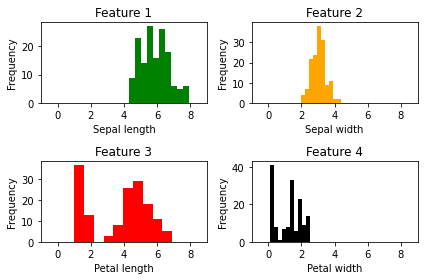

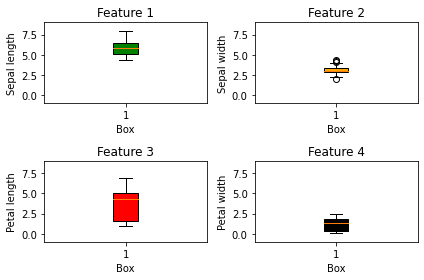

In [5]:
import matplotlib.pyplot as plt

# set colors, titles and axes names for our histograms and boxplots
colors = ['g', 'orange', 'r', 'k']
titles = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

# create a figure with 4 subplots, each one having one histogram
f, a = plt.subplots(2, 2)
a = a.ravel()
for idx, ax in enumerate(a):
    ax.hist(iris[idx], color=colors[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(feature_names[idx])
    ax.set_ylabel("Frequency")
    ax.set_xlim(-1, 9)
plt.tight_layout()
plt.show()

# create figure with 4 subplots, one for each boxplot/classroom
f, a = plt.subplots(2, 2)
a = a.ravel()
for idx, ax in enumerate(a):
    bp = ax.boxplot(iris[idx], patch_artist=True)
    bp['boxes'][0].set(facecolor = colors[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel("Box")
    ax.set_ylabel(feature_names[idx])
    ax.set_ylim(-1, 9)
plt.tight_layout()
plt.show()

- We can see in feature 1 histogram that the data for the feature is not centered in comparison with the remaining features. Most of the data is pending to high values. That is the opposite case for feature 4. Feature 2 and 3 have more centered values. This is in accordance to the variable means discussed earlier. Feature 1 boxplot also show us that 50% of the data (everything between quartile 1 and 3) are above value 5.

- Also following the reported variance, feature 3 histogram and boxplot show us how much the data can get away from the mean. Meanwhile, feature 4 has a very compact box in the boxplot and few very populated bars in the histogram, what corroborates the small variance reported before

- Considering skewness, we had said that the distributions were probably very normal-looking with small skewness for some features. As we can see in the histograms, that does not seem to be the case for variables 3 and 4. Indeed the skewness measure is not robust to some situations where we have a distorted distribution, like the ones we can observe in the histograms for features 3 and 4. In both of these cases, there is a large amount of values that are separated from the main distribution, actually creating a very positive skewness. If we interpret the boxplots, we can get the same conclusion: the mean is closer to higher values, indicating that there are fewer values in the "right" side of the distribution, a positive skew.

- Finally, there is the kurtosis, which was also correctly previewd by our analysis of the kurtosis measure. Feature 2 has the "tallest" distribution curve of all, considering its histogram. As small variance and high kurtosis are related phenomena, we can observe the boxplot for feature 2 and see how compact the values are, that leads to a tall distribution curve.



---

Lastly, we can build scatter plots to evaluate possible correlations between variables pairs. To do that, we will use the handy `pairplot` function from the seaborn library.

Before we do that, let's first try to measure the covariance and correlation between Iris' variables. After interpreting the measures, we can proof-check with the pair plots.

In [13]:
for i in range(4):
    for j in range(4):
        print("Covariance between feature", i, "and feature", j, ":\n", np.cov(iris[i], iris[j], rowvar=False))
        print("\n")

Covariance between feature 0 and feature 0 :
 [[0.68569351 0.68569351]
 [0.68569351 0.68569351]]


Covariance between feature 0 and feature 1 :
 [[ 0.68569351 -0.03926846]
 [-0.03926846  0.18800403]]


Covariance between feature 0 and feature 2 :
 [[0.68569351 1.27368233]
 [1.27368233 3.11317942]]


Covariance between feature 0 and feature 3 :
 [[0.68569351 0.5169038 ]
 [0.5169038  0.58241432]]


Covariance between feature 1 and feature 0 :
 [[ 0.18800403 -0.03926846]
 [-0.03926846  0.68569351]]


Covariance between feature 1 and feature 1 :
 [[0.18800403 0.18800403]
 [0.18800403 0.18800403]]


Covariance between feature 1 and feature 2 :
 [[ 0.18800403 -0.32171275]
 [-0.32171275  3.11317942]]


Covariance between feature 1 and feature 3 :
 [[ 0.18800403 -0.11798121]
 [-0.11798121  0.58241432]]


Covariance between feature 2 and feature 0 :
 [[3.11317942 1.27368233]
 [1.27368233 0.68569351]]


Covariance between feature 2 and feature 1 :
 [[ 3.11317942 -0.32171275]
 [-0.32171275  0.188

The antidiagonal of the covariance matrices are telling us that there is a high covariance between features 2 and 3 and between features 0 and 2. Features 0 and 3 have a little bit of covariance too. We cannot conclude much about the magnitude of the covariances here because it depends on the magnitudes of the variables themselves. Variables with larger ranges also have larger covariances. 

The main diagonal of these matrices is the feature variance, already studied before.

In [12]:
for i in range(4):
    for j in range(4):
        print("Correlation between feature", i, "and feature", j, ":\n", np.corrcoef(iris[i], iris[j], rowvar=False))
        print("\n")

Correlation between feature 0 and feature 0 :
 [[1. 1.]
 [1. 1.]]


Correlation between feature 0 and feature 1 :
 [[ 1.         -0.10936925]
 [-0.10936925  1.        ]]


Correlation between feature 0 and feature 2 :
 [[1.         0.87175416]
 [0.87175416 1.        ]]


Correlation between feature 0 and feature 3 :
 [[1.         0.81795363]
 [0.81795363 1.        ]]


Correlation between feature 1 and feature 0 :
 [[ 1.         -0.10936925]
 [-0.10936925  1.        ]]


Correlation between feature 1 and feature 1 :
 [[1. 1.]
 [1. 1.]]


Correlation between feature 1 and feature 2 :
 [[ 1.        -0.4205161]
 [-0.4205161  1.       ]]


Correlation between feature 1 and feature 3 :
 [[ 1.         -0.35654409]
 [-0.35654409  1.        ]]


Correlation between feature 2 and feature 0 :
 [[1.         0.87175416]
 [0.87175416 1.        ]]


Correlation between feature 2 and feature 1 :
 [[ 1.        -0.4205161]
 [-0.4205161  1.       ]]


Correlation between feature 2 and feature 2 :
 [[1. 

Covariances may be hard to interpret since they are not bounded in any way, so they can go to infinity. Because of that, the correlation, bounded between -1 and 1, is usually more meaningful, since we can get a maximum correlation.

The main diagonal here is the correlation between the features with themselves, therefore, they can be ignored. The antidiagonal will give us the correlation between variables. We can conclude the same that we did with the covariance matrices and, additionally, say that the correlation between features 0 and 3 is very close to perfect. That is also the case for features 0 and 2. Conclusively, we can say that these highly correlated variables plotted together are going to almost form a linear diagonal line in a scatter plot.

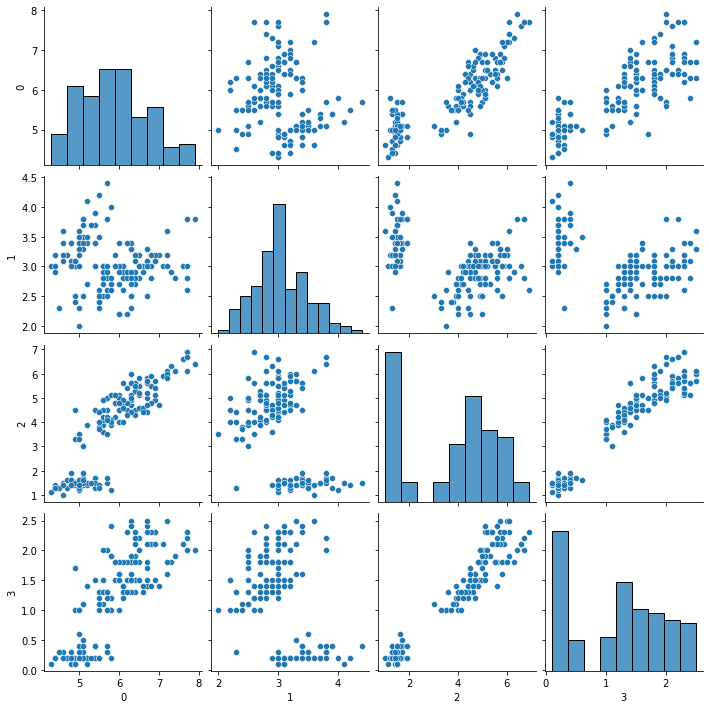

In [7]:
import seaborn as sns

sns.pairplot(iris)

We can verify our previous assumptions in these scatter plots with feature pairs. We can ignore the plots above the main diagonal, since they are just inverted versions of the plots below the main diagonal. The main diagonal itself has histograms for each feature.

Features 0 and 2 have a high correlation, just like features 2 and 3. This can be seen as they tend to form a diagonal line across the scatter plot. This diagonal line means that for every x value of a feature A, there is a y value of feature B that is almost equal. Remaining scatter plots are very disperse, so we can discard any correlation.